In [2]:
import statistics as stat

In [3]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
basepath = '/gpfs/scratch/smdick/'
paths = ['md_siesta_descr/md_siesta',
         'md_siesta_mull/md_siesta',
         'md_siesta_mull_szp/md_siesta',
         'md_siesta_descr_szp_uncorrected/md_siesta',
         'mbpol/md_siesta_pure/md_siesta_10',
         'mbpol/nose_128_10']

In [17]:
r_oh_list = []
for p in paths:
    r_oh_list.append(stat.get_roh(basepath + p, 1000, 10, 10))


/gpfs/home/smdick/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [18]:
r_oo_list = []
for p in paths:
    r_oo_list.append(stat.get_roo(basepath + p, 1000, 10, 10))


/gpfs/home/smdick/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [19]:
r_hh_list = []
for p in paths:
    r_hh_list.append(stat.get_rhh(basepath + p, 1000, 10, 10))


/gpfs/home/smdick/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [51]:
runtimes = []
for p in paths:
    runtimes.append(len(pd.read_csv(basepath + p +'.log', delim_whitespace = True)) / 2000 - 0.5)

/gpfs/home/smdick/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
runtimes

[1.6909999999999998, 1.8555000000000001, 3.13, 2.215, 10.405, 68.7115]

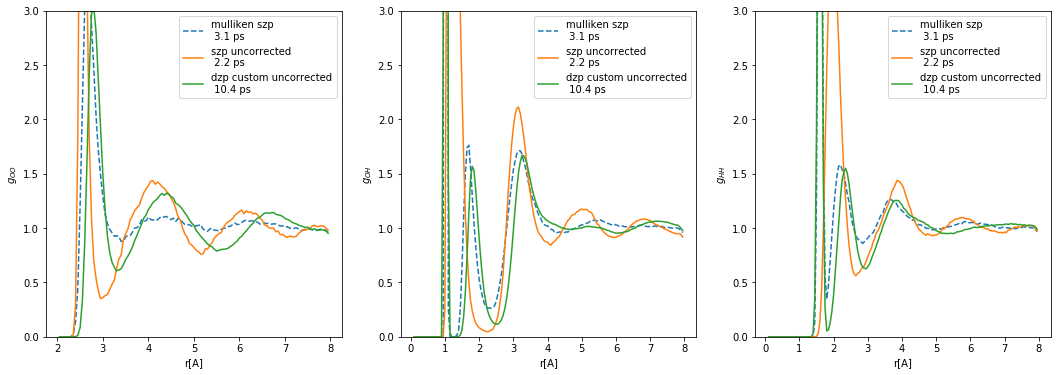

In [72]:
labels = ['descriptor', 'mulliken', 'mulliken szp', 'szp uncorrected', 'dzp custom uncorrected', 'mbpol']
# choice = ['descriptor', 'mulliken', 'mbpol', 'dzp custom uncorrected']
choice = ['mulliken szp', 'szp uncorrected', 'dzp custom uncorrected']
styles = ['-.','--','--','-', '-','-']
figsize(18,6)
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.05)[1:]
for i, [data,bins,div, t] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'])):
    
    subplot(1,3,i+1)
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            plot(bins, np.mean(r_oo, axis = 0)/div, label = l +'\n {:.1f} ps'.format(rt), ls = s)
    ylim(0,3.0)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
    legend()

savefig('rdfs_szp.eps')
savefig('rdfs_szp.pdf')